In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
np.finfo(np.float32).eps, np.sqrt(np.finfo(np.float32).eps), np.power(np.finfo(np.float32).eps, 0.7)

(1.1920929e-07, 0.00034526698, 1.4236953606213502e-05)

In [3]:
np.finfo(np.float64).eps, np.sqrt(np.finfo(np.float64).eps)

(2.220446049250313e-16, 1.4901161193847656e-08)

In [4]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib/keras_ex')
from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [5]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

In [6]:
#lm, model_gkernel = make_model_gkernel2()
lm, model_gkernel = make_model_gkernel3()
print(model_gkernel.inputs[0])
model_gkernel.summary()

W1002 22:15:58.589452 140703523243840 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1002 22:15:58.626211 140703523243840 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1002 22:15:58.641006 140703523243840 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1002 22:15:58.641809 140703523243840 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. P

Tensor("inp:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel3)    (None, 2)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_out = make_model_out()
model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = make_model(nn=4, num_cls=3, make_model_gkernel=make_model_gkernel3)
model.summary()

W1002 22:15:58.892658 140703523243840 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 2)                 9         
_________________________________________________________________
model_out (Model)            (None, 3)                 9         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(xtrain, ytrain, epochs=5, verbose=2)

W1002 22:15:59.026995 140703523243840 deprecation.py:323] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
 - 1s - loss: 1.1041 - acc: 0.3067
Epoch 2/5
 - 0s - loss: 1.1031 - acc: 0.2667
Epoch 3/5
 - 0s - loss: 1.0995 - acc: 0.2800
Epoch 4/5
 - 0s - loss: 1.0989 - acc: 0.3333
Epoch 5/5
 - 0s - loss: 1.0995 - acc: 0.3333


In [10]:
pred = model.predict(xtrain)
pred[:5]

array([[0.33851594, 0.3419879 , 0.31949612],
       [0.33898762, 0.34211427, 0.31889808],
       [0.3380056 , 0.34185052, 0.32014388],
       [0.33823776, 0.3419128 , 0.31984937],
       [0.33845475, 0.3419712 , 0.31957403]], dtype=float32)

In [11]:
np.random.choice(np.arange(xtrain.shape[0]), 3)

array([50, 62, 44])

In [12]:
model.save('saved_model')

In [13]:
ls -la

合計 5048
drwxrwxr-x. 3 admin admin     189 10月  2 22:14 ./
drwxrwxr-x. 7 admin admin    4096  9月 16 10:46 ../
drwxr-xr-x. 2 admin admin     199 10月  2 21:42 .ipynb_checkpoints/
-rw-rw-r--. 1 admin admin  855466 10月  2 22:14 dev_001-iris.ipynb
-rw-rw-r--. 1 admin admin  317982 10月  2 09:36 dev_002-digits8.ipynb
-rw-rw-r--. 1 admin admin 2321906 10月  2 08:50 dev_003-moon.ipynb
-rw-rw-r--. 1 admin admin 1573967 10月  2 08:46 dev_004-moon2.ipynb
-rw-rw-r--. 1 admin admin   63013 10月  2 22:00 dev_005-digits28.ipynb
-rw-rw-r--. 1 admin admin   24384 10月  2 22:16 saved_model


In [14]:
from keras.models import load_model

In [15]:
# load_model('saved_model', custom_objects={'GaussianKernel2': GaussianKernel2})
m = load_model('saved_model', custom_objects={'GaussianKernel3': GaussianKernel3})

In [16]:
pred = m.predict(xtrain)
pred[:5]

array([[0.33851594, 0.3419879 , 0.31949612],
       [0.33898762, 0.34211427, 0.31889808],
       [0.3380056 , 0.34185052, 0.32014388],
       [0.33823776, 0.3419128 , 0.31984937],
       [0.33845475, 0.3419712 , 0.31957403]], dtype=float32)

## Getting Started

In [17]:
'''
number of landmarks is 3
'''
clf = RBFClassifier(
    num_lm=15,
    lm_select_from_x=True
)

In [18]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.69 s, sys: 76.5 ms, total: 2.77 s
Wall time: 2.35 s


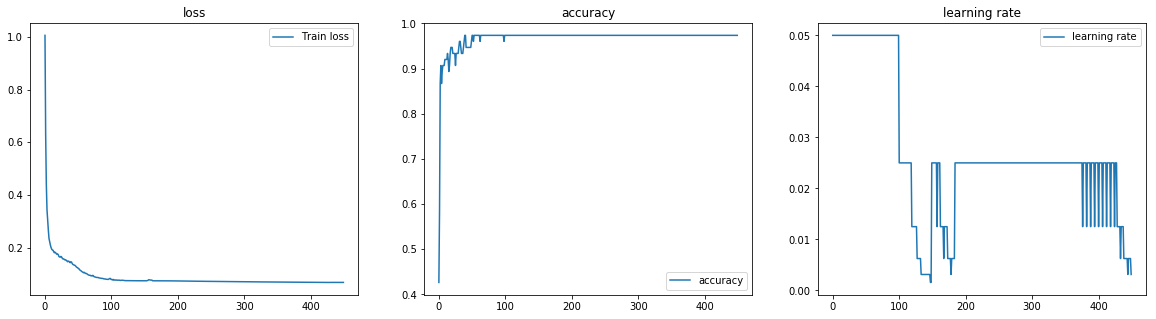

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [20]:
'''
trained gamma
'''
clf.current_gamma()

0.69710135

In [21]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.9, 3. , 1.4, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [7.2, 3. , 5.8, 1.6],
       [5. , 3.5, 1.6, 0.6],
       [5. , 3.3, 1.4, 0.2],
       [5.6, 2.8, 4.9, 2. ],
       [7.2, 3.2, 6. , 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [6.8, 3.2, 5.9, 2.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 2.4, 3.3, 1. ],
       [7.3, 2.9, 6.3, 1.8]], dtype=float32)

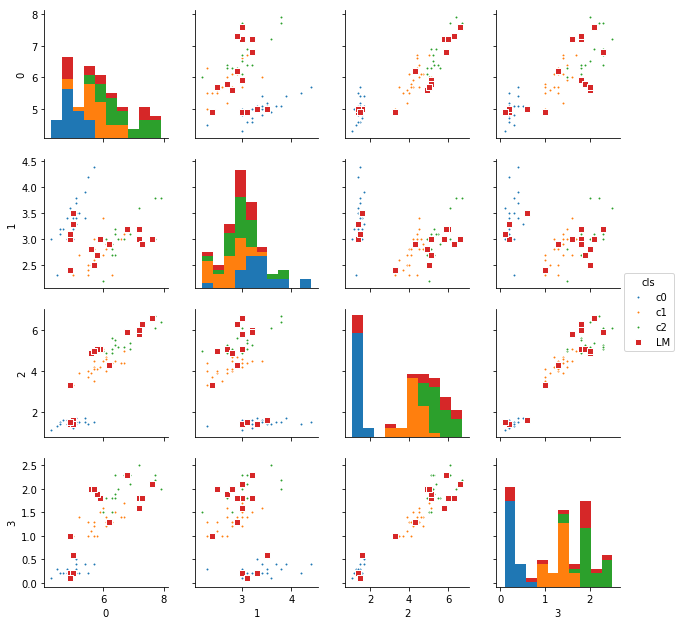

In [22]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [23]:
clf.predict_proba(xtest)[:5]

array([[9.9999952e-01, 3.1864295e-07, 6.4548338e-08],
       [9.9999952e-01, 3.1969734e-07, 6.6949347e-08],
       [9.9999940e-01, 5.0440030e-07, 1.0318454e-07],
       [9.9999928e-01, 6.3040164e-07, 1.2363051e-07],
       [9.9998963e-01, 8.5899483e-06, 1.8145171e-06]], dtype=float32)

In [24]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [25]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [26]:
pred_test = clf.predict(xtest)

In [27]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


## set landmarks on input x

In [28]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[:3]
)

In [29]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 7.33 s, sys: 223 ms, total: 7.55 s
Wall time: 6.62 s


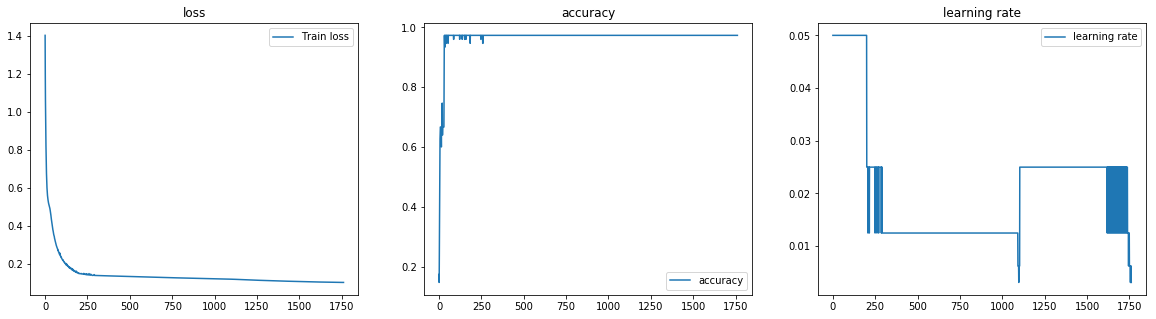

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [31]:
'''
trained gamma
'''
clf.current_gamma()

0.12754273

In [32]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=float32)

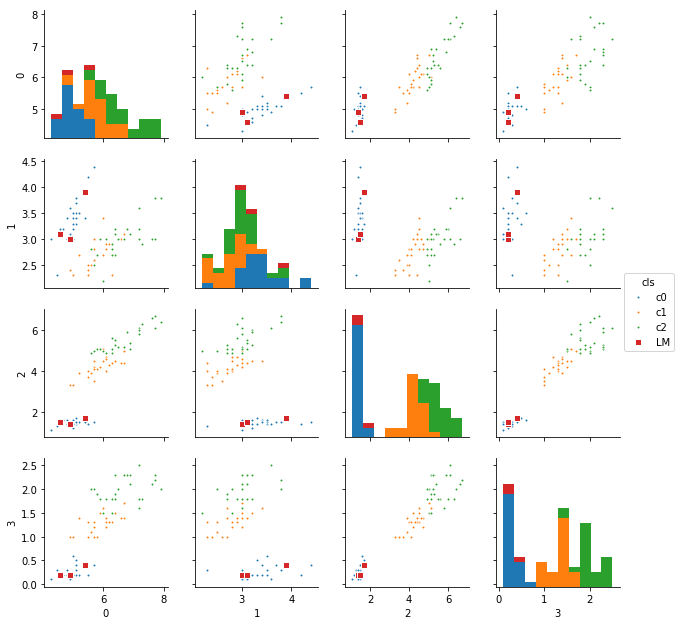

In [33]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [34]:
clf.predict_proba(xtest)[:5]

array([[9.96208668e-01, 3.79131176e-03, 9.24016926e-17],
       [9.96109664e-01, 3.89034278e-03, 2.75233959e-16],
       [9.95981097e-01, 4.01889579e-03, 1.08607875e-16],
       [9.95868921e-01, 4.13113087e-03, 2.59917777e-16],
       [9.92463350e-01, 7.53662270e-03, 4.51227241e-15]], dtype=float32)

In [35]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [36]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [37]:
pred_test = clf.predict(xtest)

In [38]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9198717948717948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.84      0.87        25
           2       0.85      0.92      0.88        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

[[25  0  0]
 [ 0 21  4]
 [ 0  2 23]]


## set landmarks on input x randomly

In [39]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 3, replace=False)]
)

In [40]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 4.77 s, sys: 114 ms, total: 4.88 s
Wall time: 6.04 s


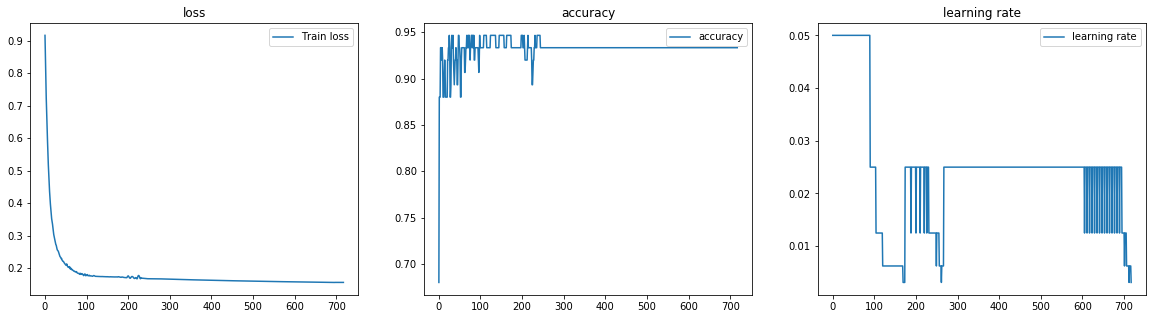

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [42]:
'''
trained gamma
'''
clf.current_gamma()

0.1709647

In [43]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6.1, 3. , 4.6, 1.4],
       [6. , 3.4, 4.5, 1.6],
       [7.2, 3.6, 6.1, 2.5]], dtype=float32)

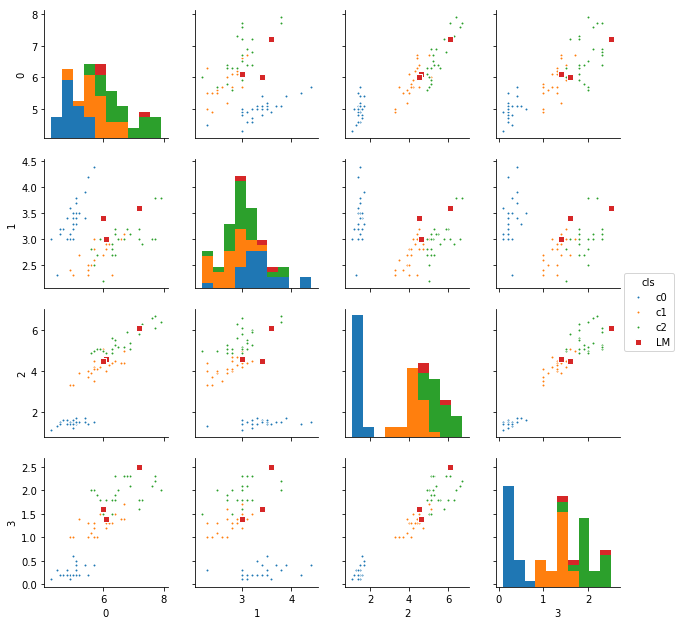

In [44]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [45]:
clf.predict_proba(xtest)[:5]

array([[0.9915854 , 0.00511117, 0.00330352],
       [0.9944132 , 0.00313703, 0.0024498 ],
       [0.9922652 , 0.00462837, 0.00310643],
       [0.993543  , 0.00373768, 0.00271926],
       [0.9948494 , 0.00284269, 0.00230782]], dtype=float32)

In [46]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [47]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9333066559957316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.88      0.92      0.90        25
           2       0.92      0.88      0.90        25

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

[[25  0  0]
 [ 0 23  2]
 [ 0  3 22]]


In [48]:
pred_test = clf.predict(xtest)

In [49]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9198717948717948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.84      0.87        25
           2       0.85      0.92      0.88        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

[[25  0  0]
 [ 0 21  4]
 [ 0  2 23]]


## set landmarks on input x randomly (num_lm = 25)

In [50]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), num_lm)]
)

In [51]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.46 s, sys: 57.1 ms, total: 3.52 s
Wall time: 4.88 s


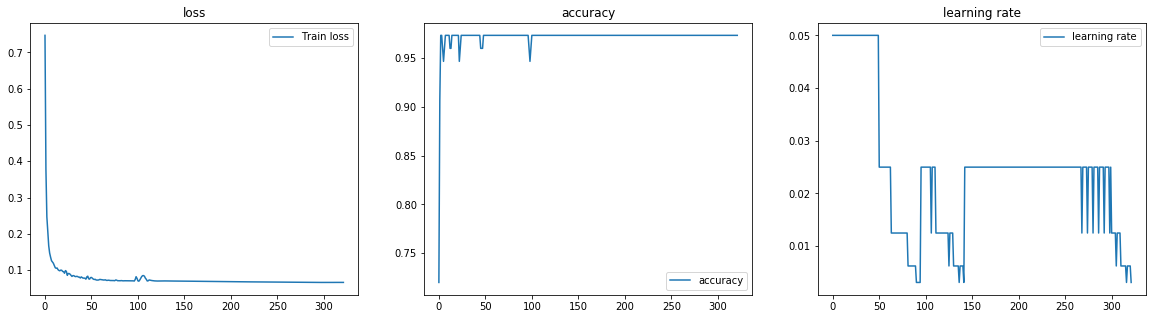

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [53]:
'''
trained gamma
'''
clf.current_gamma()

0.56600934

In [54]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[5. , 2.3, 3.3, 1. ],
       [6. , 2.7, 5.1, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.7, 2.5, 5. , 2. ],
       [4.6, 3.2, 1.4, 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [5. , 3.4, 1.5, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [6.4, 2.7, 5.3, 1.9],
       [7.7, 3. , 6.1, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 2.8, 4.1, 1.3],
       [5.8, 2.7, 4.1, 1. ],
       [6.4, 3.2, 4.5, 1.5],
       [4.8, 3. , 1.4, 0.3],
       [5.8, 2.7, 5.1, 1.9],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3. , 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [5. , 3.5, 1.6, 0.6],
       [4.6, 3.2, 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 2.3, 3.3, 1. ]], dtype=float32)

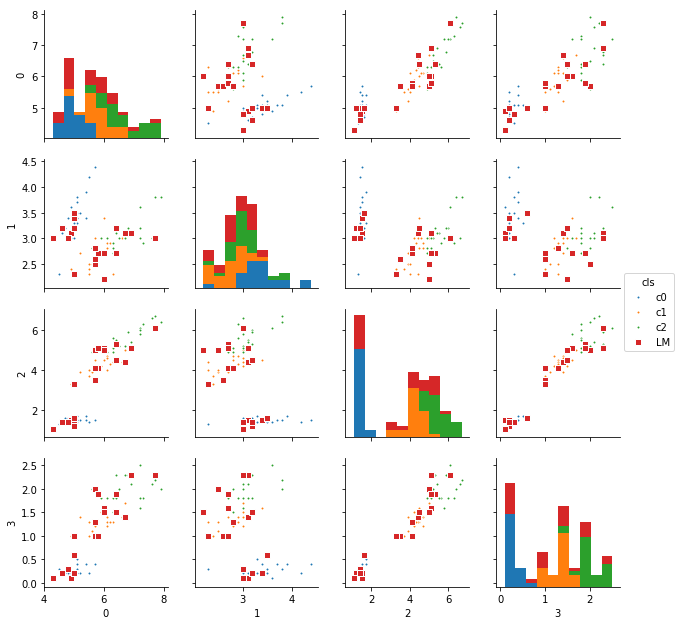

In [55]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [56]:
clf.predict_proba(xtest)[:5]

array([[9.9999905e-01, 9.6278377e-08, 8.5329856e-07],
       [9.9999976e-01, 2.0247953e-08, 2.1373999e-07],
       [9.9999881e-01, 1.1448002e-07, 1.0435484e-06],
       [9.9999964e-01, 3.9328302e-08, 3.8258568e-07],
       [9.9999845e-01, 1.6360852e-07, 1.4764056e-06]], dtype=float32)

In [57]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [58]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [59]:
pred_test = clf.predict(xtest)

In [60]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9598554797270173
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 25  0]
 [ 0  3 22]]


## set landmarks automatically on input x
* num_lm = 25

In [167]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=10001
)

In [168]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.48 s, sys: 52.5 ms, total: 2.54 s
Wall time: 2.24 s


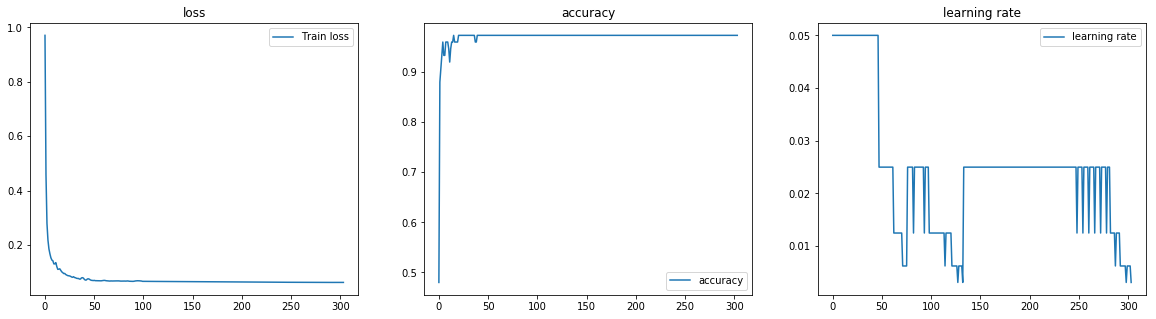

In [169]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [170]:
'''
trained gamma
'''
clf.current_gamma()

0.8463062

In [171]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6. , 3.4, 4.5, 1.6],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.2, 5. , 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.5, 5. , 2. ],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [7.7, 3. , 6.1, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.1, 3. , 4.6, 1.4],
       [4.8, 3. , 1.4, 0.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.4, 3.2, 4.5, 1.5]], dtype=float32)

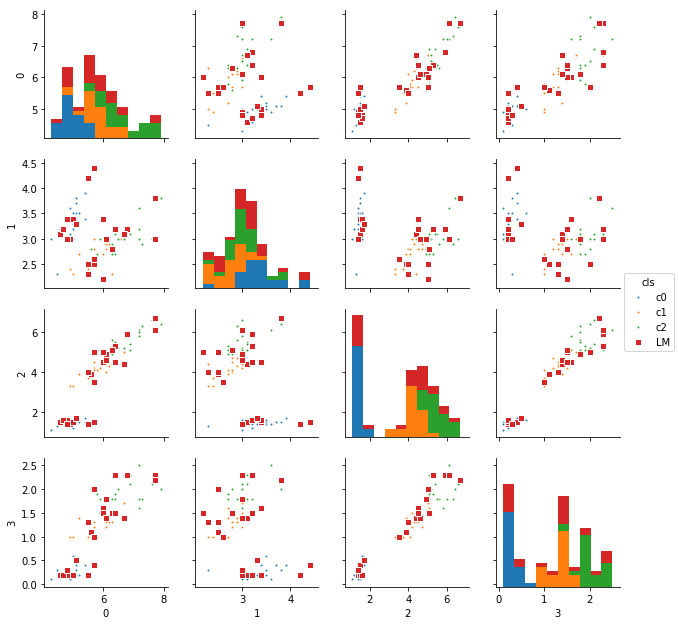

In [172]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [173]:
clf.predict_proba(xtest)[:5]

array([[9.9988317e-01, 6.3497668e-05, 5.3253199e-05],
       [9.9984419e-01, 9.9281759e-05, 5.6482790e-05],
       [9.9987245e-01, 6.8559384e-05, 5.9045880e-05],
       [9.9982280e-01, 1.0759450e-04, 6.9556067e-05],
       [9.9905568e-01, 6.0289446e-04, 3.4149765e-04]], dtype=float32)

In [174]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [175]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [176]:
pred_test = clf.predict(xtest)

In [177]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.93      1.00      0.96        25
           2       1.00      0.92      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 25  0]
 [ 0  2 23]]


## set initial landmarks manually and train
* num_lm = 15
* train landmarks

In [72]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]
# init_lm = np.c_[
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,))
# ]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    make_model_gkernel=make_model_gkernel3
)

In [73]:
init_lm

array([[5.67458648, 4.1711047 , 4.73023755, 1.84275463],
       [7.51083059, 2.74463461, 3.8198151 , 0.61149068],
       [6.59213607, 3.45314465, 4.92691211, 0.6101908 ],
       [4.01337663, 2.57990769, 5.22657671, 2.24624074],
       [7.53154812, 3.10401167, 5.35745502, 1.1451805 ],
       [7.42384608, 4.15027398, 4.46317514, 1.20679207],
       [6.1334889 , 4.166473  , 4.3386397 , 0.73054681],
       [7.14838613, 2.74882659, 2.09021463, 2.36917818],
       [6.00922324, 2.72156782, 4.65696282, 1.18573323],
       [6.98687715, 4.28107531, 5.66534242, 0.08348557],
       [5.71921623, 3.51358754, 3.98177712, 1.03408149],
       [7.53172475, 2.97739573, 2.82575996, 1.29259184],
       [7.84826466, 2.67000228, 4.64821329, 1.35424068],
       [6.76591182, 4.26478892, 2.00675071, 1.22463812],
       [5.19979436, 3.01180461, 5.64516145, 1.27705955]])

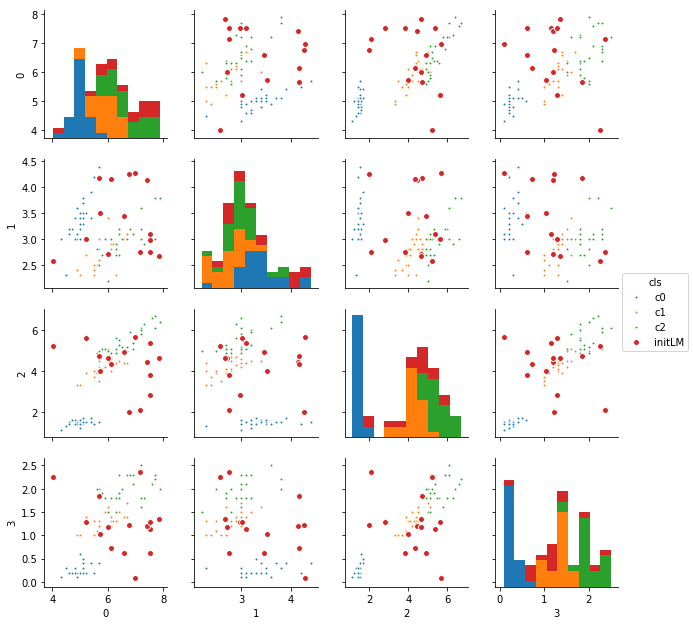

In [74]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [75]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 4.15 s, sys: 67.4 ms, total: 4.22 s
Wall time: 6.33 s


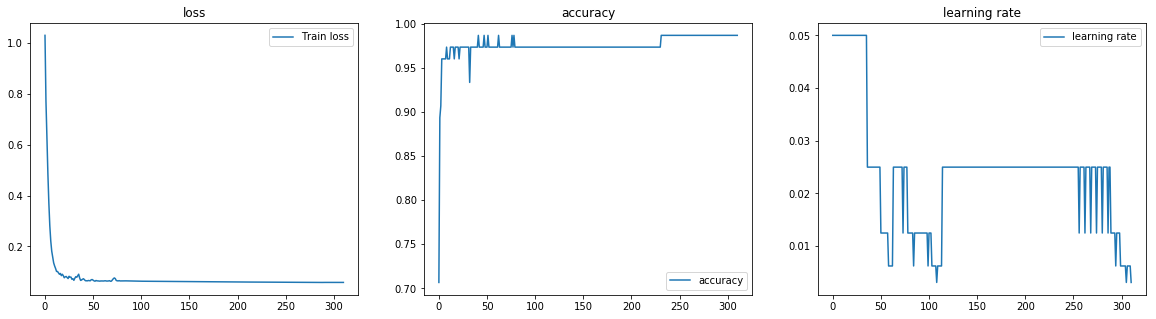

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [77]:
'''
trained gamma
'''
clf.current_gamma()

0.22662175

In [78]:
'''
trained landmarks
'''
lm = clf.current_lm()
lm

array([[6.0951433 , 3.5944    , 6.056009  , 2.9818614 ],
       [6.466697  , 3.2427816 , 3.9939234 , 0.7239562 ],
       [6.5487013 , 3.326751  , 4.0283694 , 0.5213138 ],
       [5.138706  , 2.0882933 , 4.0742965 , 1.608517  ],
       [6.178611  , 2.4779685 , 6.0758724 , 2.7213438 ],
       [6.203908  , 2.5131586 , 5.940752  , 2.812018  ],
       [6.605168  , 3.0944571 , 5.343605  , 1.79501   ],
       [5.201421  , 3.5904095 , 1.0630528 , 0.3279503 ],
       [6.330057  , 3.2332428 , 3.87875   , 0.6293887 ],
       [6.455319  , 2.73522   , 6.204918  , 2.5550053 ],
       [6.474567  , 3.3041484 , 3.5250766 , 0.6209398 ],
       [6.5884705 , 3.3106866 , 3.867956  , 0.6981637 ],
       [6.219103  , 2.4032466 , 5.753009  , 2.7389758 ],
       [5.1566396 , 3.5460584 , 1.0139222 , 0.10006315],
       [5.8763223 , 2.3098385 , 5.5483136 , 2.68667   ]], dtype=float32)

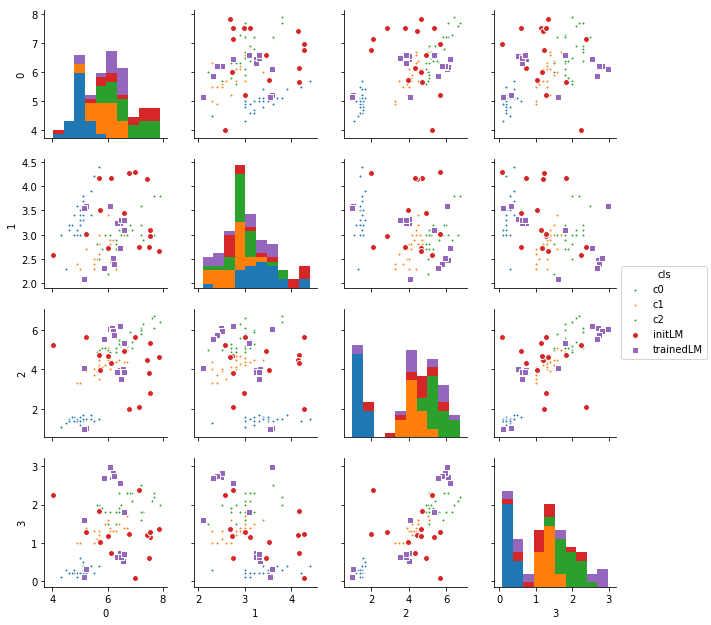

In [79]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [80]:
clf.predict_proba(xtest)[:5]

array([[9.9946874e-01, 4.1440240e-04, 1.1685462e-04],
       [9.9939632e-01, 3.7319306e-04, 2.3054135e-04],
       [9.9950576e-01, 3.6940048e-04, 1.2487591e-04],
       [9.9929702e-01, 4.4846605e-04, 2.5446978e-04],
       [9.9825591e-01, 9.8523323e-04, 7.5884187e-04]], dtype=float32)

In [81]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [82]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [83]:
pred_test = clf.predict(xtest)

In [84]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[25  0  0]
 [ 0 25  0]
 [ 0  0 25]]


## set initial landmarks manually and no train
* num_lm = 15
* train nothing, just activation

In [85]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [86]:
init_lm

array([[6.62932887, 3.25844995, 4.37798279, 2.36861623],
       [6.04664329, 2.7084421 , 2.99082276, 1.17882636],
       [6.31612726, 3.5358553 , 3.79673601, 1.07319883],
       [6.21001534, 4.02536337, 5.51665507, 0.07452068],
       [5.16540958, 4.01855539, 5.90337754, 0.74578592],
       [6.57583423, 3.32782062, 3.96584309, 1.44272817],
       [6.58767169, 2.762727  , 5.21481096, 2.26961078],
       [6.70029961, 3.08372975, 5.01397111, 0.49224861],
       [7.59497929, 2.54987361, 2.17672084, 1.41568356],
       [4.32189628, 3.56752888, 2.93566328, 0.79856062],
       [4.06581434, 2.87593555, 5.47727219, 1.10894532],
       [4.16424083, 3.19813794, 2.31889949, 0.92494808],
       [6.40540743, 3.96953006, 3.20558765, 2.19059136],
       [6.1438152 , 2.88708809, 5.29895401, 2.25087723],
       [4.40613753, 3.81280417, 5.08618562, 0.58980176]])

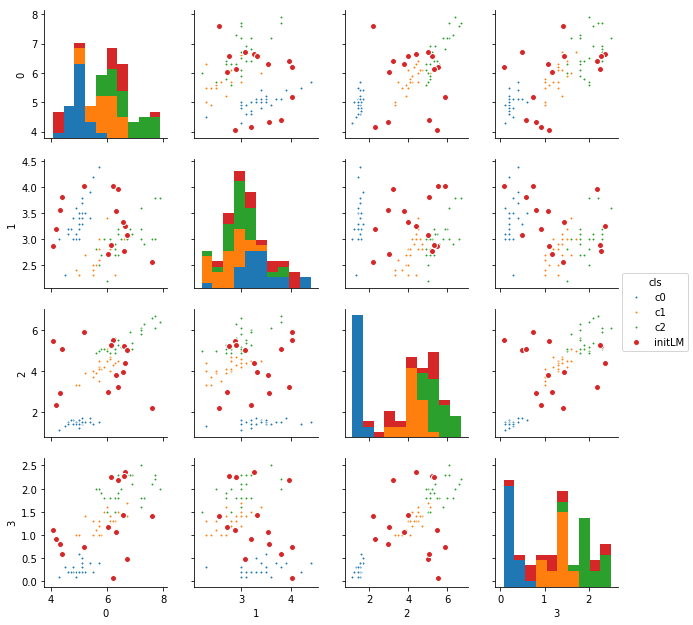

In [87]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [88]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 5.43 s, sys: 160 ms, total: 5.59 s
Wall time: 6.63 s


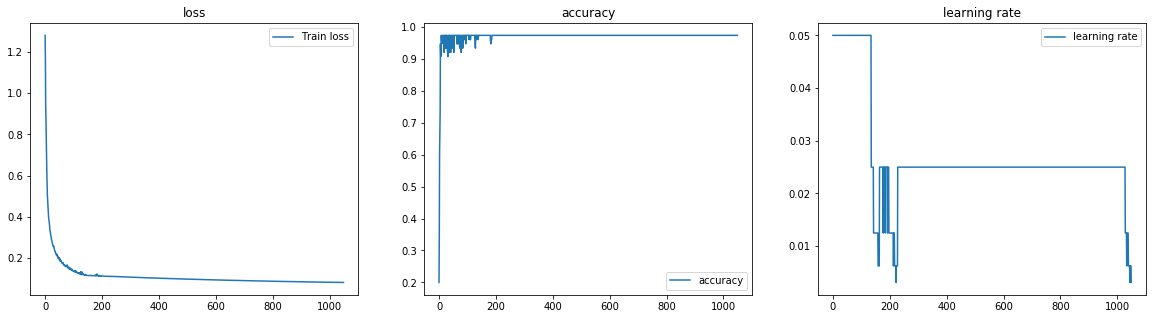

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [90]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [91]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [92]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[6.6293287 , 3.25845   , 4.3779826 , 2.3686163 ],
       [6.0466433 , 2.7084422 , 2.9908228 , 1.1788263 ],
       [6.3161273 , 3.5358553 , 3.796736  , 1.0731988 ],
       [6.2100153 , 4.0253634 , 5.516655  , 0.07452068],
       [5.1654096 , 4.018555  , 5.9033775 , 0.74578595],
       [6.5758343 , 3.3278205 , 3.9658432 , 1.4427282 ],
       [6.5876718 , 2.762727  , 5.214811  , 2.269611  ],
       [6.7002997 , 3.0837297 , 5.0139713 , 0.4922486 ],
       [7.5949793 , 2.5498736 , 2.1767209 , 1.4156835 ],
       [4.321896  , 3.567529  , 2.9356632 , 0.7985606 ],
       [4.0658145 , 2.8759356 , 5.477272  , 1.1089454 ],
       [4.164241  , 3.198138  , 2.3188994 , 0.9249481 ],
       [6.4054074 , 3.96953   , 3.2055876 , 2.1905913 ],
       [6.143815  , 2.887088  , 5.298954  , 2.2508771 ],
       [4.4061375 , 3.8128042 , 5.0861855 , 0.5898017 ]], dtype=float32)

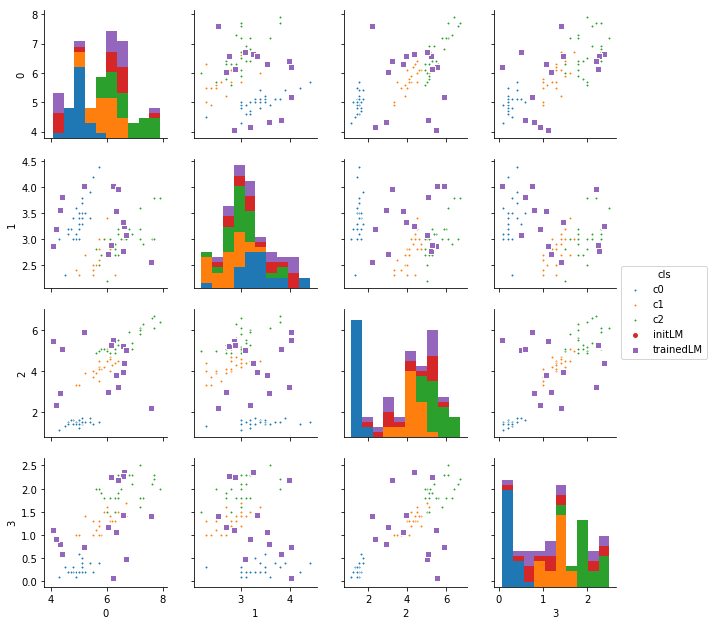

In [93]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [94]:
clf.predict_proba(xtest)[:5]

array([[9.9565327e-01, 4.3466389e-03, 6.9082105e-08],
       [9.9827647e-01, 1.7234355e-03, 6.2533623e-08],
       [9.9630821e-01, 3.6916456e-03, 7.4981870e-08],
       [9.9795026e-01, 2.0496820e-03, 7.2633540e-08],
       [9.9853194e-01, 1.4678930e-03, 9.8553144e-08]], dtype=float32)

In [95]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [96]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [97]:
pred_test = clf.predict(xtest)

In [98]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9465811965811964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      0.96      0.92        25
           2       0.96      0.88      0.92        25

   micro avg       0.95      0.95      0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]


## vector input

In [99]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [100]:
init_lm

array([[6.32970574e+00, 3.66712053e+00, 3.10358385e+00, 3.64362506e-01],
       [6.17293202e+00, 3.43740900e+00, 4.39992819e+00, 7.81239579e-01],
       [7.78088463e+00, 2.64202475e+00, 4.13832622e+00, 2.09465329e-01],
       [4.87515526e+00, 3.95012193e+00, 4.46536568e+00, 1.63408907e+00],
       [5.44306749e+00, 3.66198884e+00, 2.57979258e+00, 1.26389210e+00],
       [6.64120346e+00, 2.96664709e+00, 4.29625037e+00, 2.13955457e+00],
       [7.71497374e+00, 3.70610140e+00, 5.98177633e+00, 5.05734800e-01],
       [7.93837835e+00, 2.84747521e+00, 3.53268794e+00, 5.97346164e-01],
       [6.55930839e+00, 3.67057821e+00, 4.64282372e+00, 7.61292438e-03],
       [4.04830312e+00, 3.57003029e+00, 2.44386603e+00, 3.47105844e-02],
       [4.72324341e+00, 2.54608886e+00, 2.44292293e+00, 3.53480050e-01],
       [6.32387068e+00, 3.43164746e+00, 4.45783588e+00, 4.53591544e-01],
       [6.37805800e+00, 3.58982087e+00, 5.89562325e+00, 1.98651916e+00],
       [4.01224771e+00, 4.23592331e+00, 4.37049778e

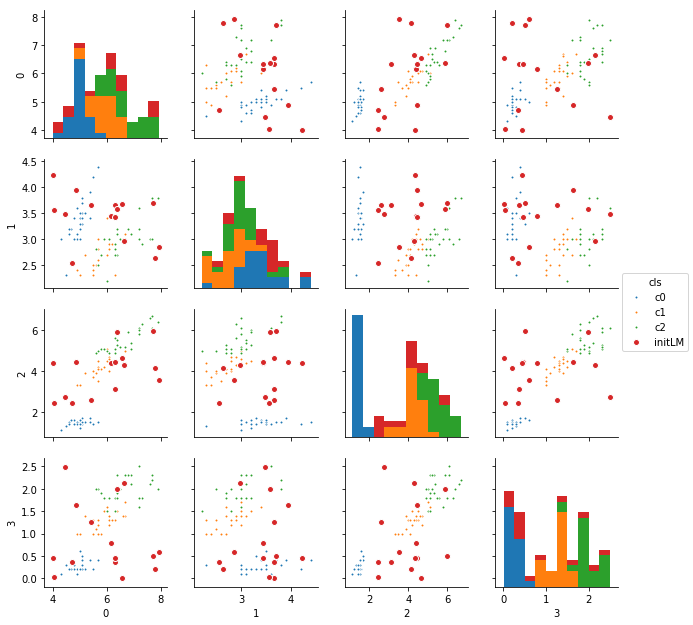

In [101]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [102]:
ytrain[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [103]:
np.argmax(ytrain, axis=1)[:5]

array([0, 0, 0, 0, 0])

In [104]:
%%time
#hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 5.86 s, sys: 155 ms, total: 6.01 s
Wall time: 6.45 s


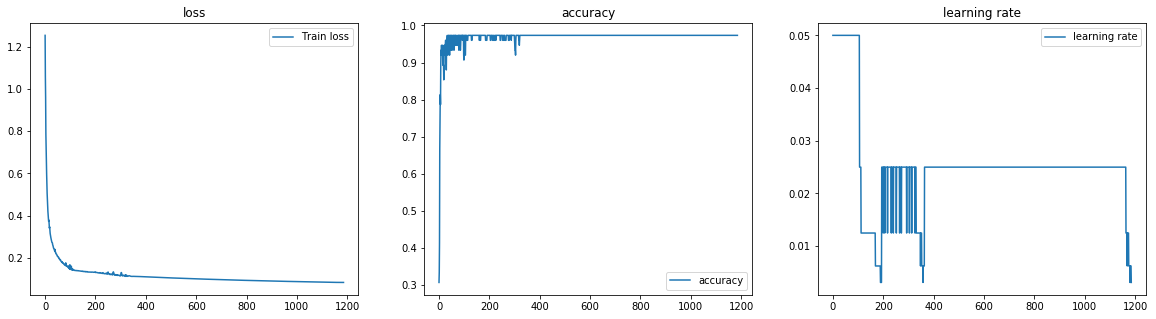

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [106]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [107]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [108]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[6.3297057e+00, 3.6671205e+00, 3.1035838e+00, 3.6436251e-01],
       [6.1729321e+00, 3.4374089e+00, 4.3999281e+00, 7.8123957e-01],
       [7.7808847e+00, 2.6420248e+00, 4.1383262e+00, 2.0946532e-01],
       [4.8751554e+00, 3.9501219e+00, 4.4653659e+00, 1.6340891e+00],
       [5.4430676e+00, 3.6619887e+00, 2.5797925e+00, 1.2638921e+00],
       [6.6412034e+00, 2.9666471e+00, 4.2962503e+00, 2.1395545e+00],
       [7.7149739e+00, 3.7061014e+00, 5.9817762e+00, 5.0573480e-01],
       [7.9383783e+00, 2.8474753e+00, 3.5326879e+00, 5.9734619e-01],
       [6.5593085e+00, 3.6705782e+00, 4.6428237e+00, 7.6129246e-03],
       [4.0483031e+00, 3.5700302e+00, 2.4438660e+00, 3.4710586e-02],
       [4.7232432e+00, 2.5460889e+00, 2.4429228e+00, 3.5348004e-01],
       [6.3238707e+00, 3.4316475e+00, 4.4578357e+00, 4.5359156e-01],
       [6.3780580e+00, 3.5898209e+00, 5.8956232e+00, 1.9865191e+00],
       [4.0122476e+00, 4.2359233e+00, 4.3704977e+00, 4.4411916e-01],
       [4.4680352e+00, 3.4857342e+

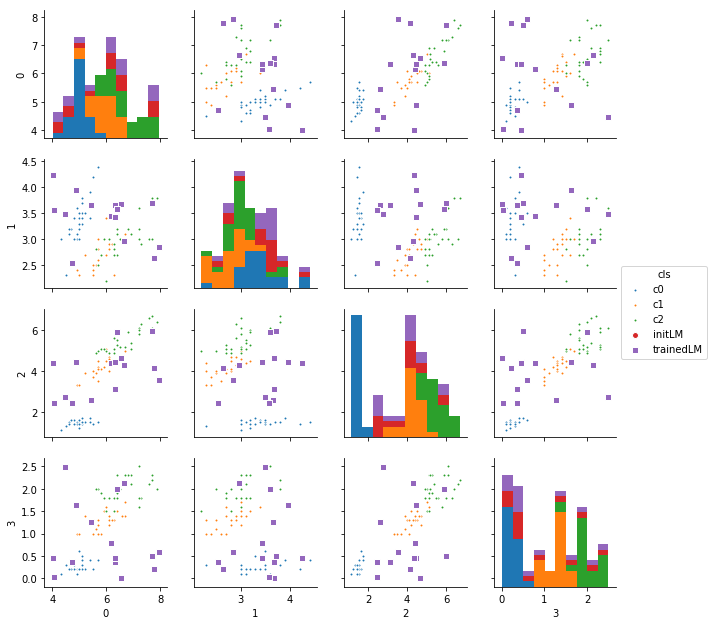

In [109]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [110]:
clf.predict_proba(xtest)[:5]

array([[9.9603301e-01, 3.9666090e-03, 4.1236819e-07],
       [9.9921691e-01, 7.8286551e-04, 1.9887163e-07],
       [9.9724716e-01, 2.7524729e-03, 3.6347677e-07],
       [9.9922681e-01, 7.7289878e-04, 2.1039642e-07],
       [9.9956042e-01, 4.3933452e-04, 1.8801735e-07]], dtype=float32)

In [111]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [112]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [113]:
pred_test = clf.predict(xtest)

In [114]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


## Regressor

In [115]:
est = RBFRegressor(
    num_lm=30,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 30)],
    make_model_gkernel=make_model_gkernel3
)
# est = RBFRegressor(
#     num_lm=10,
#     lm=xtrain[:10],
#     make_model_gkernel=make_model_gkernel3,
#     loss='mae'
# )

In [116]:
%%time
#hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 1.85 s, sys: 24.2 ms, total: 1.88 s
Wall time: 2.93 s


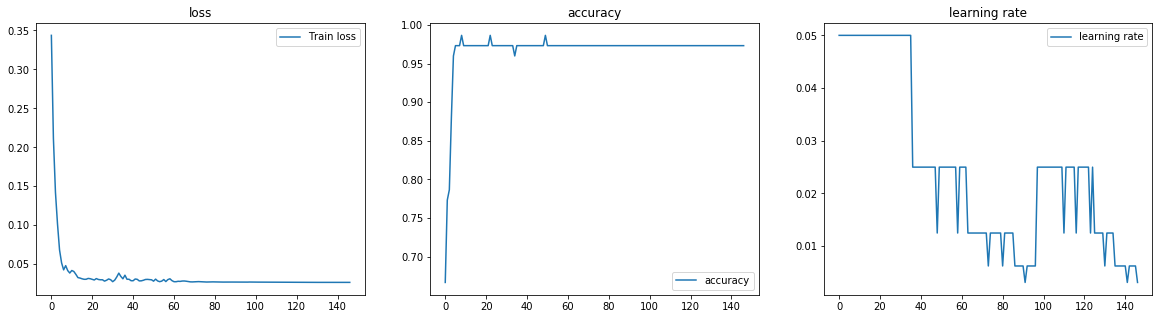

In [117]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [118]:
est.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 30)                121       
_________________________________________________________________
model_out (Model)            (None, 1)                 31        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [119]:
est.predict(xtrain)

array([ 9.6634030e-04,  1.9956976e-02,  2.8602540e-02, -8.1708431e-03,
        1.8451422e-02,  1.9773692e-02, -6.5945685e-02,  3.0303165e-02,
       -3.7407368e-02, -2.0644814e-02, -1.7887473e-02,  7.1533442e-02,
        6.4624131e-02, -9.5331669e-03,  3.9279848e-02,  8.8251531e-03,
       -6.3010454e-03, -7.1637809e-02, -4.3029726e-02, -6.1127543e-03,
        8.1217200e-02,  2.7178407e-02,  1.8160045e-03, -2.0245016e-02,
       -2.8096437e-02,  1.0150963e+00,  1.2478132e+00,  1.1823882e+00,
        8.9123881e-01,  1.1450716e+00,  1.0729809e+00,  1.2518511e+00,
        8.5987878e-01,  8.3747947e-01,  9.9361092e-01,  8.9331371e-01,
        1.1099359e+00,  9.2916137e-01,  1.5607774e+00,  7.5960076e-01,
        9.3531227e-01,  1.7134628e+00,  1.0296280e+00,  1.2029604e+00,
        1.1791607e+00,  1.1472228e+00,  9.1383433e-01,  8.8300538e-01,
        9.4433498e-01,  1.0368106e+00,  1.9315047e+00,  1.9880962e+00,
        2.0107577e+00,  2.0309474e+00,  2.1093411e+00,  2.0139079e+00,
      

In [120]:
est.__dict__

{'build_fn': <function gkernel.sklearn.make_model>,
 'model': <keras.engine.training.Model at 0x7ff77c60db00>,
 'sk_params': {'activation': 'linear',
  'callbacks': None,
  'lm': array([[4.9, 2.4, 3.3, 1. ],
         [5.1, 3.7, 1.5, 0.4],
         [4.8, 3. , 1.4, 0.3],
         [5.1, 3.4, 1.5, 0.2],
         [6.4, 3.2, 4.5, 1.5],
         [5.7, 2.6, 3.5, 1. ],
         [7.2, 3.2, 6. , 1.8],
         [6.1, 2.9, 4.7, 1.4],
         [6.1, 2.9, 4.7, 1.4],
         [6.9, 3.1, 5.4, 2.1],
         [6.1, 2.9, 4.7, 1.4],
         [5.6, 2.5, 3.9, 1.1],
         [5.9, 3. , 5.1, 1.8],
         [5.7, 2.8, 4.5, 1.3],
         [5.1, 3.3, 1.7, 0.5],
         [4.7, 3.2, 1.6, 0.2],
         [4.8, 3. , 1.4, 0.3],
         [6.4, 3.2, 4.5, 1.5],
         [5.7, 3. , 4.2, 1.2],
         [5. , 3.4, 1.5, 0.2],
         [6.9, 3.1, 5.1, 2.3],
         [7.2, 3.2, 6. , 1.8],
         [5. , 3.3, 1.4, 0.2],
         [6.4, 3.2, 4.5, 1.5],
         [5.8, 2.7, 4.1, 1. ],
         [5.1, 3.5, 1.4, 0.3],
         [7.6, 3.

In [121]:
est.score(xtrain, np.argmax(ytrain, axis=1))

75/75 [==============================] - 0s 6ms/step


-0.026738602916399637

In [122]:
est.score(xtest, np.argmax(yans, axis=1))

75/75 [==============================] - 0s 109us/step


-0.032908213337262474